In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_table('../附件/附件1：估价训练数据.txt', header=None)
columns = ['carId', 'tradeTime', 'brand', 'serial', 'model', 'mileage', 'color', 'cityId', 'carCode', 'tansferCount',
           'seatings', 'registerDate', 'licenseDate', 'country', 'makeType', 'modelYear', 'displacement', 'gearbox',
           'oilType', 'newPrice']
for i in range(15):
    columns.append('unknown' + str(i))
del i
columns.append('target')
data.columns = columns
data

,carId,tradeTime,brand,serial,model,mileage,color,cityId,carCode,tansferCount,...,unknown6,unknown7,unknown8,unknown9,unknown10,unknown11,unknown12,unknown13,unknown14,target
0,1,2021-06-28,1,1,1,4.01,1,1,1.0,0,...,NaN,1.0,5.0,2.0,1,4220*1740*1625,201709.0,1,NaN,4.24
1,2,2021-06-25,2,2,2,8.60,1,2,1.0,0,...,NaN,2.0,4.0,3.0,1+2,4630*1775*1480,201609.0,2,NaN,7.38
2,5,2021-06-19,5,5,5,15.56,1,2,3.0,0,...,NaN,NaN,NaN,NaN,NaN,4515*1725*1445,NaN,2,NaN,1.00
3,6,2021-06-29,6,6,6,6.04,1,3,1.0,3,...,2018-08-18,2.0,5.0,2.0,1,4500*1834*1707,201608.0,2,NaN,4.38
4,7,2021-06-30,7,7,7,5.70,4,1,2.0,2,...,2020-09-20,1.0,5.0,2.0,1,4315*1783*1606,201204.0,1,NaN,5.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,18531,2021-05-26,34,588,4169,10.38,5,35,3.0,0,...,NaN,1.0,5.0,2.0,1,4295*1705*1570,NaN,1,NaN,0.88
29996,4294,2020-06-03,12,92,1797,11.69,2,1,2.0,2,...,2019-09-23,1.0,4.0,3.0,1+2,4960*1845*1480,201201.0,2,NaN,8.30
29997,20584,2020-09-27,7,113,501,9.87,6,1,2.0,0,...,NaN,1.0,4.0,3.0,1,4665*1700*1510,200904.0,2,NaN,5.00
29998,11490,2020-11-09,45,131,3024,9.57,1,1,1.0,1,...,2020-07-09,1.0,4.0,3.0,3+2,4915*1820*1450,201508.0,1,NaN,28.00


In [3]:
data.describe()

,carId,brand,serial,model,mileage,color,cityId,carCode,tansferCount,seatings,...,unknown2,unknown3,unknown4,unknown5,unknown7,unknown8,unknown9,unknown12,unknown13,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,29991.000000,30000.000000,30000.000000,...,30000.000000,17892.000000,30000.000000,30000.000000,26225.000000,26256.000000,23759.000000,28381.000000,30000.000000,30000.000000
mean,37099.253567,19.228300,237.707733,5312.047767,7.144473,2.786700,7.683000,1.612184,0.510900,5.110000,...,2.031067,215.428683,26.313867,2.299467,1.582307,4.418761,2.507934,201449.680631,1.398133,18.062224
std,21423.562842,18.009168,233.329093,4055.789248,4.383048,2.037599,9.294335,0.809380,0.796347,0.671204,...,0.424548,196.882864,25.557234,1.718687,0.767380,0.614021,0.500200,282.230336,0.496486,629.444049
min,1.000000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000,1.000000,0.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,200606.000000,1.000000,0.050000
25%,18622.750000,8.000000,76.000000,1171.000000,3.907500,1.000000,1.000000,1.000000,0.000000,5.000000,...,2.000000,68.000000,9.000000,1.000000,1.000000,4.000000,2.000000,201211.000000,1.000000,6.100000
50%,36951.500000,13.000000,162.000000,4920.500000,6.540000,2.000000,4.000000,1.000000,0.000000,5.000000,...,2.000000,156.000000,19.000000,2.000000,1.000000,4.000000,3.000000,201504.000000,1.000000,10.479900
75%,55728.500000,23.000000,312.000000,8976.000000,9.540000,5.000000,14.000000,2.000000,1.000000,5.000000,...,2.000000,310.000000,34.000000,2.000000,2.000000,5.000000,3.000000,201702.000000,2.000000,18.000000
max,74156.000000,133.000000,1248.000000,12735.000000,44.740000,10.000000,93.000000,6.000000,10.000000,9.000000,...,11.000000,1037.000000,177.000000,15.000000,8.000000,6.000000,3.000000,202105.000000,3.000000,109000.000000


In [4]:
for col in ['tradeTime', 'registerDate', 'licenseDate']:
    data[col] = pd.to_datetime(data[col])
    del col
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   carId         30000 non-null  int64         
 1   tradeTime     30000 non-null  datetime64[ns]
 2   brand         30000 non-null  int64         
 3   serial        30000 non-null  int64         
 4   model         30000 non-null  int64         
 5   mileage       30000 non-null  float64       
 6   color         30000 non-null  int64         
 7   cityId        30000 non-null  int64         
 8   carCode       29991 non-null  float64       
 9   tansferCount  30000 non-null  int64         
 10  seatings      30000 non-null  int64         
 11  registerDate  30000 non-null  datetime64[ns]
 12  licenseDate   30000 non-null  datetime64[ns]
 13  country       26243 non-null  float64       
 14  makeType      26359 non-null  float64       
 15  modelYear     29688 non-null  float6

KeyboardInterrupt: 

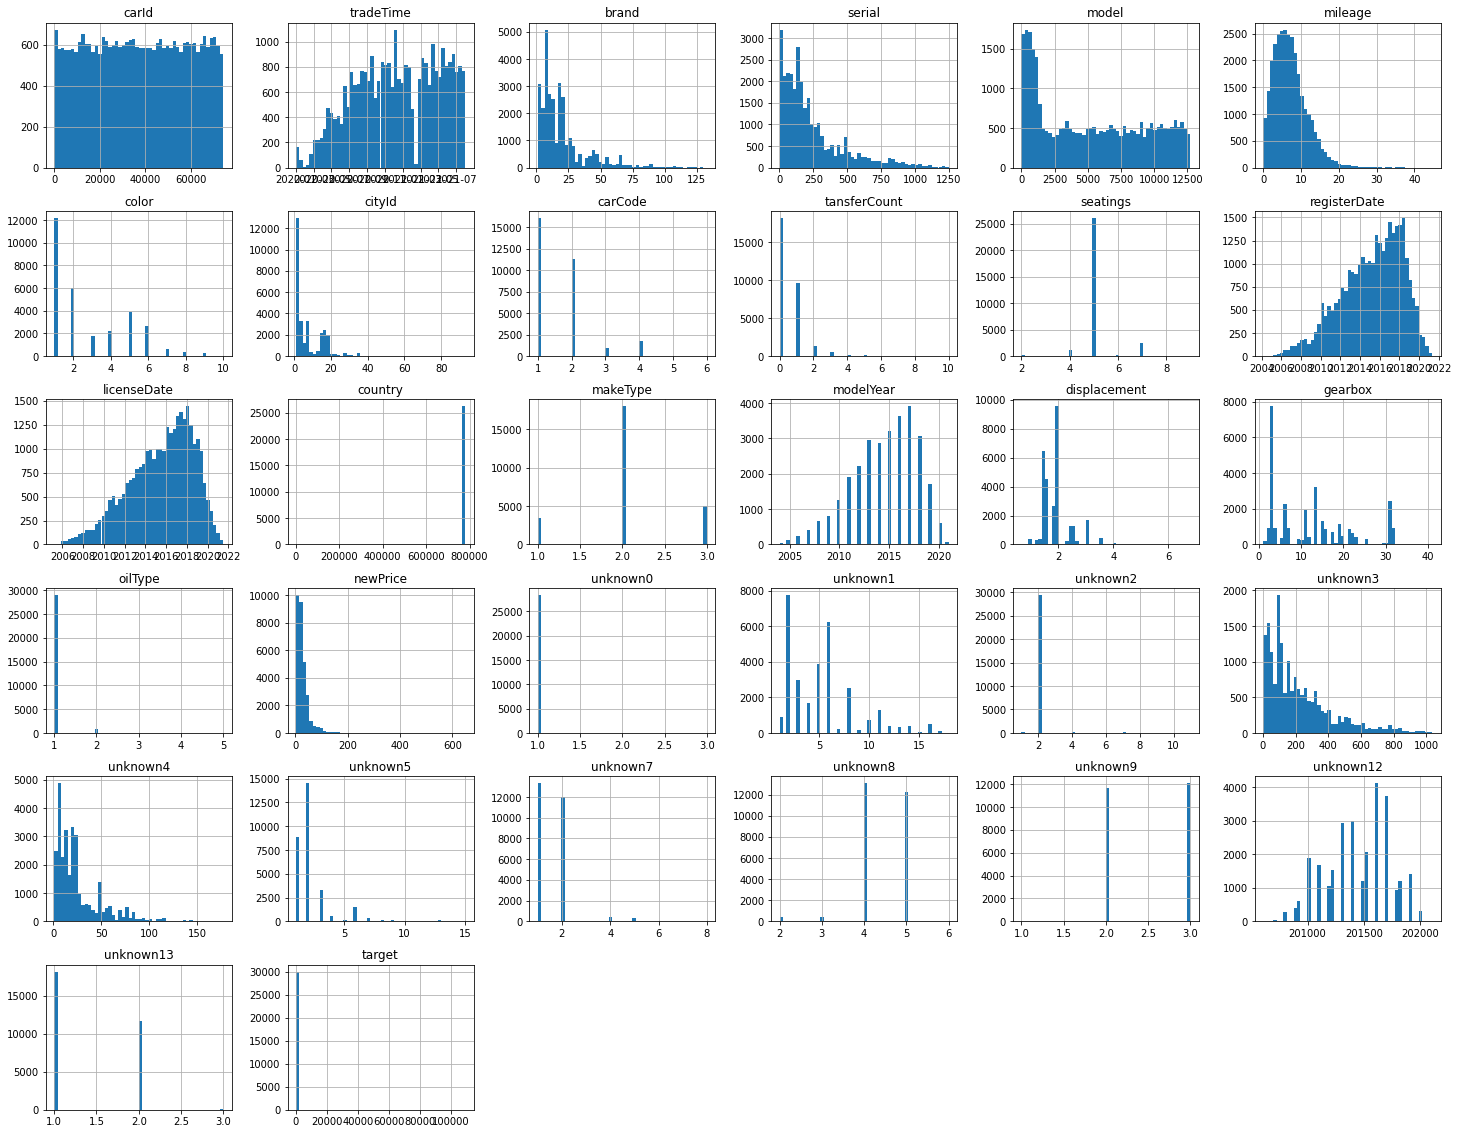

In [5]:
data.hist(bins=50, figsize=(25, 20))
plt.cla()
plt.savefig('./solve1/hist.png', dpi=800)

In [ ]:
for col in data.columns:
    print(col, data[col].value_counts())

In [ ]:
data['unknown0'] = data['unknown0'].fillna(value=1)

In [ ]:
import pandas_profiling as pp

p = pp.profile_report.ProfileReport(data)
p.to_file('report.html')

In [ ]:
"""
@:param productionTime: 注册日期与展销日期的间隔
@:param useTime:    挂牌日期与展销时间的间隔
@:param time:   此款车型出的年限
将时间型数据转化为连续的数值型数据（年限）
"""
del p
data.rename(columns={'registerDate': 'productionTime', 'licenseDate': 'useTime', 'modelYear': 'time'}, inplace=True)

data['productionTime'] = data['tradeTime'] - data['productionTime']
data['useTime'] = data['tradeTime'] - data['useTime']
data['time'] = 2021 - data['time']

data['productionTime'] = data['productionTime'].astype(np.str)
data['useTime'] = data['useTime'].astype(np.str)

data['productionTime'] = data['productionTime'].str.split()
data['productionTime'] = [np.float(i[0])/365 for i in data['productionTime'].tolist()]
data['useTime'] = data['useTime'].str.split()
data['useTime'] = [np.float(i[0])/365 for i in data['useTime'].tolist()]
data.info()

In [ ]:
data[['productionTime', 'useTime']] = data[['productionTime', 'useTime']].round(0)
data

In [ ]:
import seaborn as sns

country = data.groupby('country')
len(list(country))

In [ ]:
plt.figure(figsize=(20, 15))
for i in range(12):
    try:
        plt.subplot(3, 4, i+1)
        _ = country.get_group(data['country'].unique()[i])
        plt.title(data['country'].unique()[i])
        sns.countplot(y='brand', data=_)
    except KeyError as e:
        pass

In [ ]:
data[data['brand']==68]['country'].value_counts()

In [ ]:
# data['country'] = data['country'].replace(0, 779413)
# plt.figure(figsize=(10, 8))
# sns.countplot(data['country'])

In [ ]:
import missingno as mns


In [ ]:
mns.heatmap(data)
plt.savefig('./solve1/missing_corr.png', dpi=800)

In [ ]:
missing = (data.shape[0] - data.count()) / data.shape[0]
missing = missing[missing > 0.]
missing

In [ ]:
# 对carCode特征缺失值进行删除处理
data = data[data['carCode'].notna()]
missing = missing.iloc[1:]
missing

In [ ]:
np.unique(data['carCode'])

In [ ]:
features = [i for i in data.columns if i not in missing.index and i != 'target']
features

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# features.remove('licenseDate')
# features.remove('registerDate')
# features.remove('tradeTime')
temp = pd.DataFrame(index=features, columns=missing.index)
for index in temp.index:
    for col in temp.columns:
        try:
            _ = data[[index, col]]
            _.dropna(inplace=True)
            info = mutual_info_classif(_[index].values.reshape(-1, 1), _[col])
            temp.loc[index, col] = info[0]
            del _
            del info
        except ValueError:
            pass

temp = temp.astype(np.float)
temp.dropna(axis=0, inplace=True)
temp

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns

# 最大最小值归一化后得到各指标的信息量所占比重
plt.figure(figsize=(8, 8))
corr = MinMaxScaler().fit_transform(temp)
corr = pd.DataFrame(data=corr, index=temp.index, columns=temp.columns)
sns.heatmap(corr, cmap='RdBu')
plt.savefig('./solve1/corr1.png', dpi=800)

In [ ]:
# 创建掩码矩阵
plt.figure(figsize=(8, 8))
mask = np.zeros_like(temp[temp>1],dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style(style="white")
# 显示强相关模式的相关系数热力值，低于参考值的部分显示为白色，从而获取强相关项
# 得到互信息值的热力图
sns.heatmap(temp[temp>=1],annot=True,mask=mask,cbar=True, linewidths=.5)
plt.savefig('./solve1/corr2.png', dpi=800)

In [ ]:
for i in missing.index:
    print(i, data[i].nunique())

In [ ]:
_ = importance.T
_['score'] = score
importance = _.T
importance

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(importance.iloc[:-1], linewidths=.5)
plt.savefig('./DecisionTreeFeatureSelection.png', dpi=800)

In [ ]:
importance = importance[[i for i in importance.columns if importance[i].loc['score'] > .8]]
importance

In [ ]:
for col in importance.columns:
    feature = importance.index[:-1]
    _ = data[data[col].notna()]
    X = _[feature]
    y = _[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    print(col, rf.score(X_test, y_test))
    unknown = data[data[col].isnull()][feature]
    predict = rf.predict(unknown)
    data.loc[(data[col].isnull()), col] = predict

In [ ]:
mns.bar(data)

In [ ]:
missing = (data.shape[0] - data.count()) / data.shape[0]
missing = missing[missing > 0.]
missing

In [ ]:
data

In [ ]:
data['unknown12'] = pd.to_datetime(data['unknown12'],format='%Y%m')
data

In [ ]:
dt = DecisionTreeClassifier()
_ = data[data['time'].notna()]
X = _[['model', 'brand', 'serial']]
y = _['time']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

In [ ]:
data.drop('unknown14', axis=1, inplace=True)
data.drop('unknown6', axis=1, inplace=True)
data.dropna(axis=0, inplace=True)
data

In [ ]:
data

In [ ]:
data['unknown12'] = (data['tradeTime'] - data['unknown12']).astype(np.str)
data['unknown12'] = data['unknown12'].str.split()
data['unknown12'] = [np.float(i[0])/365 for i in data['unknown12'].tolist()]
data = pd.get_dummies(data, columns=['unknown10'])
data['unknown11'] = data['unknown11'].str.split('*')
data

In [ ]:
data['unknown11_1'] = [np.float(i[0])/1000 for i in data['unknown11'].tolist()]
data['unknown11_2'] = [np.float(i[1])/1000 for i in data['unknown11'].tolist()]
data['unknown11_3'] = [np.float(i[2])/1000 for i in data['unknown11'].tolist()]
data.drop(columns=['unknown11'], inplace=True)
data

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
country = le.fit_transform(data['country'])
data['country'] = country

In [ ]:
X = data[[i for i in data.columns if i not in ['target']]]
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [ ]:
def ape(model, train, target):
    predict = model.predict(train)
    loss = np.abs(target - predict)
    print('ape: ', str(loss / target))
    return loss / target

In [ ]:
def mape(model, train, target):
    ap = ape(model, train, target)
    shape = ap.shape[0]
    print('mape: ', str(np.sum(ap) / shape))
    return np.sum(ap) / shape

In [ ]:
def accuracy5(model, train, target):
    a = ape(model, train, target)
    total = a.shape[0]
    ape5 = a[a<=.05].shape[0]
    print('acc5: ', str(ape5 / total))
    return ape5 / total

def metrics(model, train, target):
    m = mape(model, train, target)
    accuracy = accuracy5(model, train, target)
    return 0.2*(1-m) + 0.8*accuracy

In [ ]:
from sklearn.feature_selection import f_regression

f, p = f_regression(X, y)
F = pd.DataFrame(columns=X.columns, index=['f', 'p'])
F.loc['f'] = f
F.loc['p'] = p
F

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X)

X_train, X_test = ss.transform(X_train), ss.transform(X_test)

model = xgb.XGBRegressor(random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
metrics(model, X_test, y_test)

In [ ]:
data['brand'].unique()

In [ ]:
data[data['brand'] == 68]